# Home Assignment No. 3: Part 1 

In this part of the homework you are to solve several problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

In [3]:
import numpy as np
import pandas as pd

import torch

%matplotlib inline
import matplotlib.pyplot as plt

<br>

# Bayesian Models. GLM

## Task 1 (1 pt.)

Consider a univariate Gaussian distribution $\mathcal{N}(x; \mu, \tau^{-1})$.
Let's define Gaussian-Gamma prior for parameters $(\mu, \tau)$:

\begin{equation}
    p(\mu, \tau)
        = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1})
            \otimes \text{Gamma}(\tau; a, b)
        \,.
\end{equation}

Find the posterior distribution of $(\mu, \tau)$ after observing $X = (x_1, \dots, x_n)$.

**BEGIN Solution**



**END Solution**

<br>

## Task 2 (1 + 1 + 1 = 3 pt.)

Evaluate the following integral using the Laplace approximation:
\begin{equation}
    x \mapsto \int \sigma(w^T x) \mathcal{N}(w; 0, \Sigma) dw \,,
\end{equation}
for $x = \bigl(\tfrac23, \tfrac16, \tfrac16\bigr)\in \mathbb{R}^3$ and 
\begin{equation}
    \Sigma
        = \begin{pmatrix}
             1    & -0.25 & 0.75 \\
            -0.25 &  1    & 0.5  \\
             0.75 &  0.5  & 2
           \end{pmatrix}
        \,.
\end{equation}

### Task 2.1 (1 pt.)
Use the Hessian matrix computed numericaly via finite differences. (Check out [Numdifftools](https://pypi.python.org/pypi/Numdifftools))

$\int g(x)\exp(f(x))dx \approx g(x_0)\exp(f(x_0))\frac{(2\pi)^{n/2}}{{\rm det}(-\nabla^2f(x_0))^{1/2}}$, where $x_0$ is the stationary point of $f$

In [8]:
import numdifftools as nd
from scipy.optimize import minimize
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
from scipy.stats import multivariate_normal

def sigmoid(x,y):
    return 1/(1 + np.exp(-x.dot(y)))

def f(x,y):
    return sigmoid(x, y)*multivariate_normal.pdf(x, mean=np.zeros(3), 
     cov=np.array([[1., -.25, .75], 
                  [-.25, 1., .5], 
                  [.75, .5, 2.]]))
    

x = np.array([2/3, 1/6, 1/6])
dim = len(x)
matrix = np.array([[1., -.25, .75], 
                  [-.25, 1., .5], 
                  [.75, .5, 2.]])

hessian = nd.Hessian(lambda p: np.log(f(p, x)))
stationary = minimize(lambda p: -f(p, x), np.zeros(dim)).x

f(stationary, x)*(2*np.pi)**(dim/2)/np.linalg.det(-hessian(stationary))**.5

0.497919749994547

<br>

### Task 2.2 (1 pt.)
Use the diagonal approximation of the Hessian computed by autodifferentiation
in **pytorch**.

In [17]:
import torch
from torch.autograd import Variable, grad

In [26]:
### BEGIN Solution

### END Solution

<br>

### Task 2.3 (1 pt.)

Compare the results comparing the `absolute errors` of the results (this is possible with Monte-Carlo estimate of the integral). Write 1-2 sentences in the results discussion.

In [13]:
### BEGIN Solution

### END Solution

Relative error, 1 case = 0.002
Relative error, 2 case = 0.406


**BEGIN Solution**

**END Solution**

<br>

# Gaussian Processes

## Task 3 (1 + 2 = 3 pt.)

### Task 3.1 (1 pt.)

Assuimng the matrices $A \in \mathbb{R}^{n \times n}$ and $D \in \mathbb{R}^{d \times d}$
are invertible, using **gaussian elimination** find the inverse matrix for the following
block matrix:
\begin{equation}
    \begin{pmatrix} A & B \\ C & D \end{pmatrix} \,,
\end{equation}
where $C \in \mathbb{R}^{d \times n}$ and $B \in \mathbb{R}^{n \times d}$.

**BEGIN Solution**

**END Solution**

<br>

### Task 3.2 (2 pt.)

Assume that the function $y(x)$, $x \in \mathbb{R}^d$, is a realization of the Gaussian
Process $GP\bigl(0; K(\cdot, \cdot)\bigr)$ with $K(a, b) = \exp({- \gamma \|a - b\|_2^2}))$.

Suppose two datasets were observed: **noiseless** ${D_0}$ and **noisy** ${D_1}$
\begin{aligned}
    & D_0 = \bigl(x_i, y(x_i) \bigr)_{i=1}^{n} \,, \\
    & D_1 = \bigl(x^\prime_i, y(x^\prime_i) + \varepsilon_i \bigr)_{i=1}^{m} \,,
\end{aligned}
where $\varepsilon_i \sim \text{ iid } \mathcal{N}(0, \sigma^2)$, independent of process $y$.

Derive the conditional distribution of $y(x) \big\vert_{D_0, D_1}$ at a new $x$.

**BEGIN Solution**

**END Solution**

<br>

## Task 4 (1 + 2 = 3 pt.)

### Task 4.1 (1 pt.)

> In the late 1950’s Charles Keeling invented an accurate way to measure atmospheric $CO_2$ concentration and began taking regular measurements at the Mauna Loa observatory.


Take `monthly_co2_mlo.csv` file, load it and prepare the data.

0. Load the `CO2 [ppm]` time series
1. Replace $-99.99$ with **NaN** and drop the missing observations
2. Split the time series into train and test
3. Normalize the target value by fitting a transformation on the train
4. Plot the resulting target against the time index

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

### BEGIN Solution

data = pd.read_csv(r'data/monthly_co2_mlo.csv')
y = pd.Series(data['CO2 [ppm]'])

y = y.replace(-99.99, np.nan)
y = y.dropna()
X = data['year'][y.index]
X = X.subtract(X.min())

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=.33, 
                                                        random_state=42, 
                                                        shuffle=False)

scaler = StandardScaler()
scaler.fit(y_train.values.reshape(-1,1))
y_train = scaler.transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

### END Solution

Text(0, 0.5, 'CO2 [ppm]')

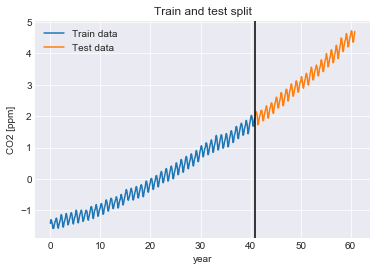

In [63]:
# >>> your code here <<<
y_train_plt = pd.Series(y_train.reshape(y_train.shape[0], ), index=X_train)
y_test_plt = pd.Series(y_test.reshape(y_test.shape[0], ), index=X_test)
y_train_plt.plot(label='Train data')
y_test_plt.plot(label='Test data')
plt.axvline(x=X_train.max(), color='k')
plt.title('Train and test split')
plt.legend(loc='best')
plt.ylabel('CO2 [ppm]')

<br>

### Task 4.2 (2 pt.)

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

1. Plot mean and confidence interval of the prediction. 
2. Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
3. Estimate the prediction error with `r2_score`. R2-score accepted > 0.83 on test sample.

In [64]:
from GPy.models import GPRegression
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear
from sklearn.metrics import r2_score

In [65]:
#from seminars
def plot_results(model, X_test, y_test):
    
    print(model)
    
    x = np.concatenate((model.X, X_test))
    
    prediction, variance = model.predict(x)
    std = np.sqrt(variance).ravel()
    prediction = prediction.ravel()
    
    test_pred = model.predict(X_test)[0]
    train_pred = model.predict(model.X)[0]
    
    plt.figure(figsize=(15, 5))
    plt.plot(model.X, model.Y, 'xk', markersize=1., label='Train data')
    plt.plot(X_test, y_test, 'xr', markersize=1., label='Test data')
    plt.plot(model.X, train_pred, label='Prediction Train')
    plt.plot(X_test, test_pred, label='Prediction test')
    plt.fill_between(x.ravel(), prediction - std,
                     prediction + std, alpha=0.3, label='Confidence')
    
    plt.xlabel('year', fontsize=14)
    plt.ylabel('CO2 [ppm]', fontsize=14)
    plt.legend(loc='best')
    plt.title('Prediction on train test split')
    plt.show()
    
    plt.figure(figsize=(15, 5))
    plt.plot(model.Y, train_pred, 'ro', markersize=2., alpha=0.7, label='Train')
    plt.plot(y_test, test_pred, 'bo', markersize=2., alpha=0.7, label='Test')
    plt.plot(prediction, prediction, 'k', label=r'y = x')
    plt.xlabel('True value', fontsize=14)
    plt.ylabel('Predicted value', fontsize=14)
    plt.legend(loc='best')
    plt.title('QQ-plot')
    plt.show()
    
    print('r2_score Train: %0.3f' % r2_score(y_train, train_pred))
    print('r2_score Test: %0.3f' % r2_score(y_test, test_pred))

In [68]:
X_test = X_test.values.reshape(-1, 1)
X_train = X_train.values.reshape(-1, 1)

y_test = y_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

xlim = [X.min(), X.max()]

In [75]:
### BEGIN Solution

periodic_kern = StdPeriodic(input_dim=1)
periodic_kern.period.constrain_bounded(1e-2, 1e1)
periodic_kern.lengthscale.constrain_bounded(1e-2, 1e1)

rbf_kern = RBF(input_dim=1)
rbf_kern.lengthscale.constrain_bounded(1e-2, 1e1)

white_kernel = White(1)

poly_kernel = Poly(1, order=2)

kernel = rbf_kern
kernel += white_kernel
kernel += poly_kernel
kernel += periodic_kern*white_kernel

m = GPRegression(X_train, y_train, kernel)
m.optimize()

### END Solution

reconstraining parameters std_periodic.period
reconstraining parameters std_periodic.lengthscale
reconstraining parameters rbf.lengthscale



Name : GP regression
Objective : -266.2037362368525
Number of Parameters : 11
Number of Optimization Parameters : 11
Updates : True
Parameters:
  GP_regression.                    |                  value  |  constraints  |  priors
  sum.rbf.variance                  |   0.009342294083499547  |      +ve      |        
  sum.rbf.lengthscale               |      9.999575916183169  |   0.01,10.0   |        
  sum.white.variance                |   0.004465670676588829  |      +ve      |        
  sum.poly.variance                 |     0.2373599630858056  |      +ve      |        
  sum.poly.scale                    |  0.0017317600239427672  |      +ve      |        
  sum.poly.bias                     |     2.8533919199417306  |      +ve      |        
  sum.mul.std_periodic.variance     |    0.09712257451549919  |      +ve      |        
  sum.mul.std_periodic.period       |                    1.0  |   0.01,10.0   |        
  sum.mul.std_periodic.lengthscale  |                    1.0  |

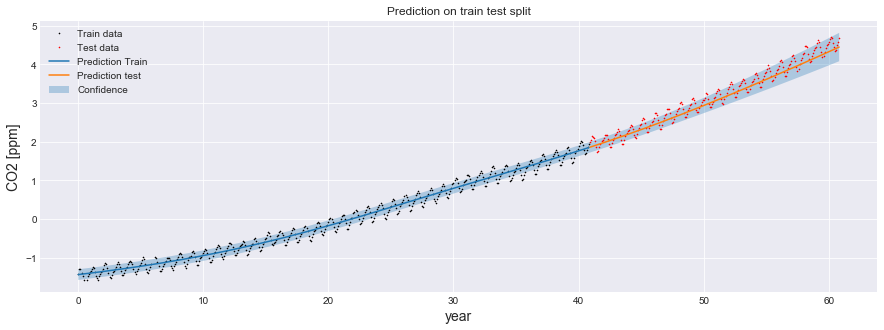

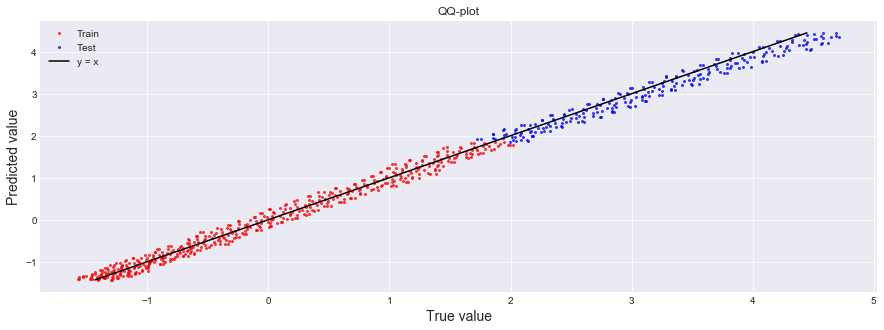

r2_score Train: 0.982
r2_score Test: 0.952


In [76]:
# >>> your code here <<<
plot_results(m, X_test, y_test)

In [61]:
r2_score(# >>> your code here <<<)

0.839219217819017